<a href="https://colab.research.google.com/github/Nik8x/Dask_Python_Dataframe_7GB/blob/master/Dask_Python_Dataframe_7GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Dask provides high-level Array, Bag, and DataFrame collections that mimic NumPy, lists, and Pandas but can operate in parallel on datasets that don’t fit into main memory. Dask’s high-level collections are alternatives to NumPy and Pandas for large datasets.*

[311 Service Requests – 7Gb+ CSV](https://data.cityofnewyork.us/Social-Services/311-Service-Requests/fvrb-kbbt)

In [2]:
%%time
!wget "https://data.cityofnewyork.us/api/views/fvrb-kbbt/rows.csv?accessType=DOWNLOAD"

--2019-08-02 22:37:00--  https://data.cityofnewyork.us/api/views/fvrb-kbbt/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [    <=>             ]   7.88G  4.29MB/s    in 33m 40s 

Last-modified header invalid -- time-stamp ignored.
2019-08-02 23:10:41 (3.99 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [8458119477]

CPU times: user 22.4 s, sys: 5.49 s, total: 27.9 s
Wall time: 33min 40s


In [0]:
!rm -r sample_data/

In [6]:
%%bash
mv rows.csv\?accessType\=DOWNLOAD 311.csv
ls -la -h

total 7.9G
drwxr-xr-x 1 root root 4.0K Aug  2 23:13 .
drwxr-xr-x 1 root root 4.0K Aug  2 22:34 ..
-rw-r--r-- 1 root root 7.9G Aug  2 23:10 311.csv
drwxr-xr-x 1 root root 4.0K Aug  1 16:08 .config
drwxr-xr-x 2 root root 4.0K Aug  2 22:36 .ipynb_checkpoints


In [8]:
%%time
!wc -l 311.csv

21242044 311.csv
CPU times: user 1.63 s, sys: 255 ms, total: 1.89 s
Wall time: 5min 11s


In [0]:
!pip install dask[complete]
import dask.dataframe as dd

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")
sns.set(color_codes = True)
plt.style.use('ggplot')

In [0]:
filename = '311.csv'
df = dd.read_csv(filename, dtype='str')
# the data isn’t read into memory. we’ve just set up the dataframe to be ready to do some 
# compute functions on the data in the csv file using familiar functions from pandas.

In [11]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,31182049,07/28/2015 08:16:00 AM,07/31/2015 12:50:00 PM,DEP,Department of Environmental Protection,Water System,High Water Pressure (WHP),NaN,11218,161 PROSPECT PARK SOUTHWEST,PROSPECT PARK SOUTHWEST,VANDERBILT ST,REEVE PL,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,07/31/2015 12:50:00 PM,07 BROOKLYN,BROOKLYN,991674,177743,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6545370494088,-73.97324394564914,"(40.6545370494088, -73.97324394564914)"
1,31182050,07/27/2015 07:59:00 PM,07/30/2015 12:00:00 PM,DSNY,BCC - Brooklyn South,Sanitation Condition,12 Dead Animals,Sidewalk,11230,1480 EAST 12 STREET,EAST 12 STREET,AVENUE N,AVENUE O,NaN,NaN,ADDRESS,BROOKLYN,NaN,DSNY Garage,Closed,NaN,07/30/2015 12:00:00 PM,14 BROOKLYN,BROOKLYN,994796,162766,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.613425200105816,-73.96201568213259,"(40.613425200105816, -73.96201568213259)"
2,31182053,07/28/2015 12:00:00 AM,08/05/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10075,NaN,NaN,NaN,NaN,EAST 80 STREET,2 AVENUE,INTERSECTION,NEW YORK,NaN,NaN,Closed,08/27/2015 11:44:33 AM,08/05/2015 12:00:00 AM,08 MANHATTAN,MANHATTAN,996836,221277,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.77402161430348,-73.95455873895823,"(40.77402161430348, -73.95455873895823)"
3,31182054,07/28/2015 07:36:00 PM,08/04/2015 03:55:00 AM,DEP,Department of Environmental Protection,Water System,Hydrant Knocked Over/Missing (WC),NaN,11219,4714 13 AVENUE,13 AVENUE,47 ST,48 ST,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,08/04/2015 03:55:00 AM,12 BROOKLYN,BROOKLYN,986717,170993,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63601252362889,-73.99111141407735,"(40.63601252362889, -73.99111141407735)"
4,31182055,07/28/2015 11:40:42 PM,07/29/2015 02:13:48 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,556 WEST 180 STREET,WEST 180 STREET,AUDUBON AVENUE,ST NICHOLAS AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,07/29/2015 07:40:42 AM,07/29/2015 02:13:48 AM,12 MANHATTAN,MANHATTAN,1002666,248335,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84827805311061,-73.93343552336337,"(40.84827805311061, -73.93343552336337)"


In [12]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [13]:
# We see that there’s some spaces in the column names. Let’s remove those spaces to make things easier to work with.
%%time
df = df.rename(columns={c: c.replace(' ', '') for c in df.columns})

CPU times: user 24.1 ms, sys: 1.71 ms, total: 25.8 ms
Wall time: 28.2 ms


In [17]:
%%time
df.shape[0].compute(), df.shape[1]

CPU times: user 4min 48s, sys: 9.73 s, total: 4min 57s
Wall time: 5min 11s


(21242043, 38)

In [24]:
%%time 
df.info(memory_usage = 'deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 38 entries, UniqueKey to Location
dtypes: object(38)
memory usage: 6.0 GB
CPU times: user 4min 45s, sys: 9.1 s, total: 4min 54s
Wall time: 5min 12s


In [26]:
%time dfna = df.isna().sum().compute()

CPU times: user 5min 43s, sys: 9.45 s, total: 5min 52s
Wall time: 5min 38s


In [31]:
dfna

UniqueKey                             0
CreatedDate                           0
ClosedDate                       619444
Agency                                0
AgencyName                            0
ComplaintType                         0
Descriptor                       231006
LocationType                    5264404
IncidentZip                     1283479
IncidentAddress                 4125915
StreetName                      4127278
CrossStreet1                    7083419
CrossStreet2                    7161638
IntersectionStreet1            17890309
IntersectionStreet2            17897853
AddressType                      974125
City                            1290172
Landmark                       21123986
FacilityType                   15756465
Status                                0
DueDate                        12716534
ResolutionActionUpdatedDate      371065
CommunityBoard                        0
Borough                               0
XCoordinate(StatePlane)         1984867


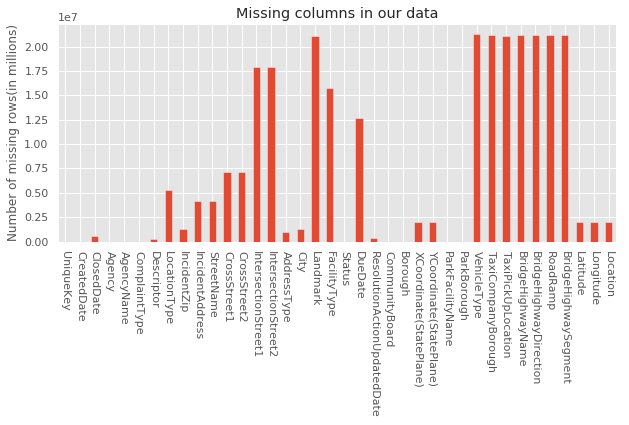

In [42]:
plt.figure(figsize = (10, 4))
dfna.plot(kind='bar')
plt.title('Missing columns in our data')
plt.ylabel('Number of missing rows(in millions)')
plt.xticks(rotation = -90)
plt.show()

In [34]:
%whos

Variable   Type         Data/Info
---------------------------------
dd         module       <module 'dask.dataframe' <...>k/dataframe/__init__.py'>
df         DataFrame    Dask DataFrame Structure:<...>k Name: rename, 532 tasks
dfna       Series       UniqueKey                <...>    1984867\ndtype: int64
filename   str          311.csv
np         module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd         module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns        module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
warnings   module       <module 'warnings' from '<...>b/python3.6/warnings.py'>


In [51]:
%time dfstatusvc = df.Status.value_counts().compute()

CPU times: user 4min 57s, sys: 13 s, total: 5min 10s
Wall time: 5min 26s


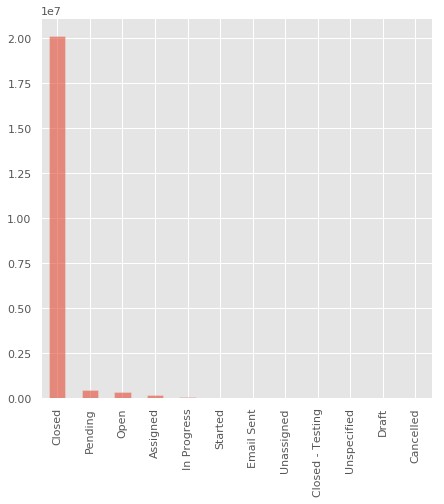

In [52]:
# Have a look at the status of tickets
dfstatusvc.plot(kind = 'bar', alpha = 0.6, figsize = (7, 7))
plt.show()